# Part 1: Basic KNN Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the penguins dataset
penguins = sns.load_dataset('penguins')
print("Dataset shape:", penguins.shape)
print("\nFirst few rows:")
print(penguins.head())

Dataset shape: (344, 7)

First few rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [2]:
# Data preprocessing
print("Missing values before cleaning:")
print(penguins.isnull().sum())

# Drop rows with missing values
penguins_clean = penguins.dropna()
print(f"\nDataset after cleaning: {penguins_clean.shape}")

# Select features and target
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_clean[features]
y = penguins_clean['species']

print(f"\nFeatures: {features}")
print("Target classes:", y.unique())

Missing values before cleaning:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Dataset after cleaning: (333, 7)

Features: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Target classes: ['Adelie' 'Chinstrap' 'Gentoo']


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Class distribution in training set:\n{y_train.value_counts()}")

Training set size: 233
Test set size: 100
Class distribution in training set:
species
Adelie       102
Gentoo        83
Chinstrap     48
Name: count, dtype: int64


In [4]:
# Feature scaling (important for KNN since it uses distance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy (k=5): {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy (k=5): 1.0000

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        44
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



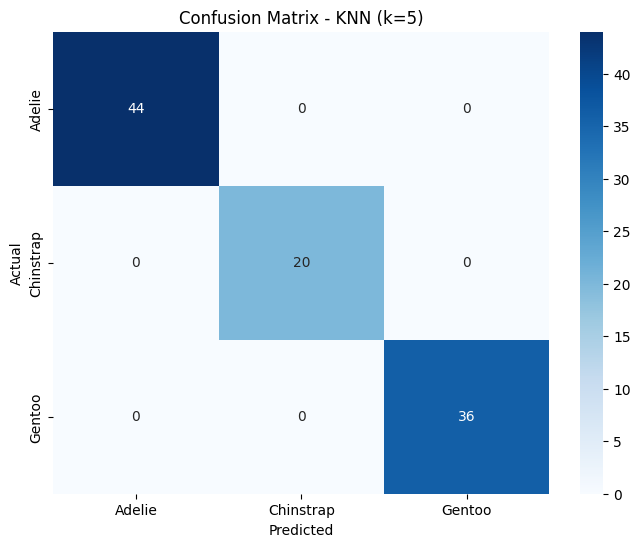

In [5]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix - KNN (k=5)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()